In [1]:
import numpy as np
import math
import statistics as stat
import random
import pandas as pd

from scipy.optimize import isotonic_regression

from matchings import cross_bin_matching, same_bin_matching, immediate_neighbor_matching, max_weight_matching
from scipy.stats import norm
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as patches


lblue = (40/255,103/255,178/255)
sgreen = (46/255,139/255,87/255)
cred = (0.69411765, 0.01568627, 0.05490196)

In [2]:
def SCINT_test(X, Y, M, nperm=500):
    Del_X = np.array([X[i]-X[j] for (i,j) in M])
    Del_Y = np.array([Y[i]-Y[j] for (i,j) in M])
    
    D_S = np.einsum('ij, j, j -> i', 
                    (np.random.rand(nperm, len(M)) < .5), 
                    Del_X, 
                    Del_Y)
    
    return (1+np.sum(D_S <= 0))/(1+nperm)

In [3]:
data = pd.read_csv('Heart_disease_cleveland_new.csv')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(303, 14)
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [5]:
np.unique(data["target"])

array([0, 1])

<Axes: xlabel='age', ylabel='trestbps'>

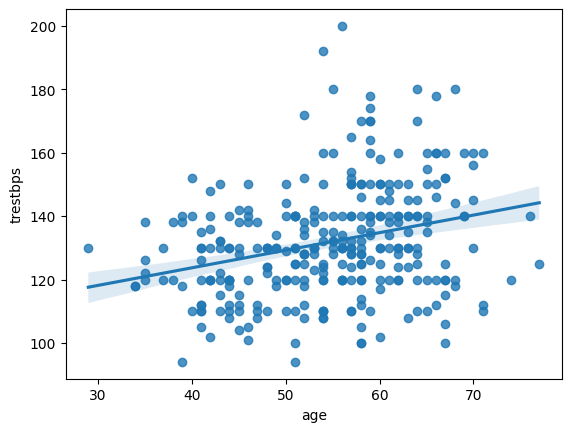

In [12]:
import seaborn as sns
#plt.plot(data["age"], data["trestbps"], '.', c=lblue)
sns.regplot(x="age", y="trestbps", data=data)#, logistic=True)

#check monotonicity hypothesis-- binary $Y$, so monotonicity of mean

In [15]:
Z = np.array(data["age"])
X = np.array(data["target"])

## cholesterol
Y = np.array(data["chol"])
M_nbhd = immediate_neighbor_matching(Y, Z)
print(SCINT_test(X ,Y, M_nbhd), len(M_nbhd))

## blood pressure
Y = np.array(data["cp"])
M_nbhd = immediate_neighbor_matching(Y, Z)
print(SCINT_test(X ,Y, M_nbhd), len(M_nbhd))

## blood sugar
Y = np.array(data["trestbps"])
M_nbhd = immediate_neighbor_matching(Y, Z)
print(SCINT_test(X ,Y, M_nbhd), len(M_nbhd))

0.6746506986027944 74
0.001996007984031936 37
0.5289421157684631 80


In [10]:
#eta = 1/50
K = 150
## cholesterol
Z = np.array(data["age"])
X = np.array(data["target"])


Y = np.array(data["chol"])
M_cb = cross_bin_matching(Y,Z,K)
print(SCINT_test(X,Y,M_cb), len(M_cb))

## blood pressure
Y = np.array(data["cp"])
M_cb = cross_bin_matching(Y, Z,K)
print(SCINT_test(X, Y,M_cb), len(M_cb))

## blood sugar
Y = np.array(data["fbs"])
M_cb = cross_bin_matching(Y, Z,K, binary=True)
print(SCINT_test(X, Y, M_cb), len(M_cb))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 148/148 [00:00<00:00, 23771.04it/s]


0.33532934131736525 121


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 148/148 [00:00<00:00, 30050.68it/s]


0.001996007984031936 95


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 148/148 [00:00<00:00, 52615.44it/s]

0.32335329341317365 42
